<a href="https://colab.research.google.com/github/ShivanshGupta55/News_Headlines_Is_Sarcastic/blob/master/Is_Sarcastic%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.enable_eager_execution()

In [0]:
#Downloading Dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-03-19 13:27:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-03-19 13:27:31 (97.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json
with open("/tmp/sarcasm.json",'r') as f:
  datastore =  json.load(f)

In [0]:
#Extracting features and labels
sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
#Separating training and test data
import numpy as np
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

In [0]:
#initializing variables
vocab_size = 10000
embed_dim = 16
max_length =32
padding_type = 'post' 
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = np.array(pad_sequences(training_sequences, maxlen = max_length, truncating = trunc_type, padding=padding_type))

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = np.array(pad_sequences(testing_sequences, maxlen = max_length, truncating=trunc_type, padding=padding_type))

In [0]:
#Define model
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embed_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data = (testing_padded,testing_labels), verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
20000/20000 - 5s - loss: 0.5816 - acc: 0.6944 - val_loss: 0.4104 - val_acc: 0.8299
Epoch 2/10
20000/20000 - 4s - loss: 0.3222 - acc: 0.8695 - val_loss: 0.3433 - val_acc: 0.8526
Epoch 3/10
20000/20000 - 4s - loss: 0.2421 - acc: 0.9060 - val_loss: 0.3394 - val_acc: 0.8492
Epoch 4/10
20000/20000 - 4s - loss: 0.1963 - acc: 0.9247 - val_loss: 0.3594 - val_acc: 0.8453
Epoch 5/10
20000/20000 - 4s - loss: 0.1648 - acc: 0.9381 - val_loss: 0.3689 - val_acc: 0.8521
Epoch 6/10
20000/20000 - 4s - loss: 0.1394 - acc: 0.9509 - val_loss: 0.3971 - val_acc: 0.8501
Epoch 7/10
20000/20000 - 4s - loss: 0.1209 - acc: 0.9590 - val_loss: 0.4271 - val_acc: 0.8456
Epoch 8/10
20000/20000 - 4s - loss: 0.1043 - acc: 0.9653 - val_loss: 0.4624 - val_acc: 0.8411
Epoch 9/10
20000/20000 - 4s - loss: 0.0920 - acc: 0.9700 - val_loss: 0.5066 - val_acc: 0.8389
Epoch 10/10

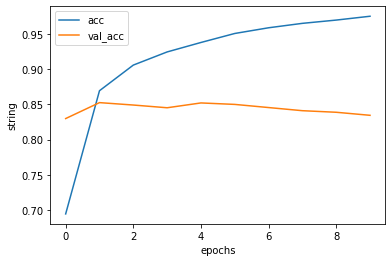

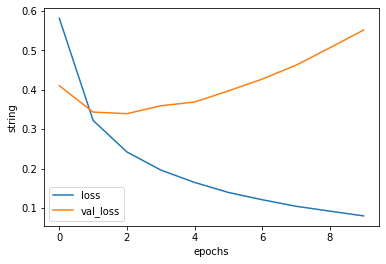

In [0]:
#Visualizing 
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel('string')
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "acc")
plot_graphs(history, "loss")
